In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras.layers import Flatten, Dense, Dropout
from keras.models import Sequential

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_valid = X_valid.reshape(-1, 784)

In [5]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=[784,]))
model.add(Dropout(0,2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0,2))
model.add(Dense(10, activation='softmax'))

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(
    X_train,
    y_train,
    epochs=60,
    batch_size=512,
    validation_data=(X_valid, y_valid)
)

Epoch 1/60
108/108 [==============================] - 2s 7ms/step - loss: 0.6960 - accuracy: 0.7667 - val_loss: 0.4768 - val_accuracy: 0.8388
Epoch 2/60
108/108 [==============================] - 1s 6ms/step - loss: 0.4397 - accuracy: 0.8451 - val_loss: 0.4180 - val_accuracy: 0.8492
Epoch 3/60
108/108 [==============================] - 1s 5ms/step - loss: 0.3961 - accuracy: 0.8583 - val_loss: 0.3760 - val_accuracy: 0.8688
Epoch 4/60
108/108 [==============================] - 1s 5ms/step - loss: 0.3638 - accuracy: 0.8692 - val_loss: 0.3562 - val_accuracy: 0.8722
Epoch 5/60
108/108 [==============================] - 1s 5ms/step - loss: 0.3392 - accuracy: 0.8780 - val_loss: 0.3462 - val_accuracy: 0.8716
Epoch 6/60
108/108 [==============================] - 1s 5ms/step - loss: 0.3245 - accuracy: 0.8827 - val_loss: 0.3441 - val_accuracy: 0.8724
Epoch 7/60
108/108 [==============================] - 1s 5ms/step - loss: 0.3105 - accuracy: 0.8878 - val_loss: 0.3277 - val_accuracy: 0.8808
Epoch 

In [9]:
results = model.evaluate(X_test, y_test)
print(results)

313/313 [==============================] - 1s 1ms/step - loss: 111.6712 - accuracy: 0.8496
[111.67120361328125, 0.8496000170707703]


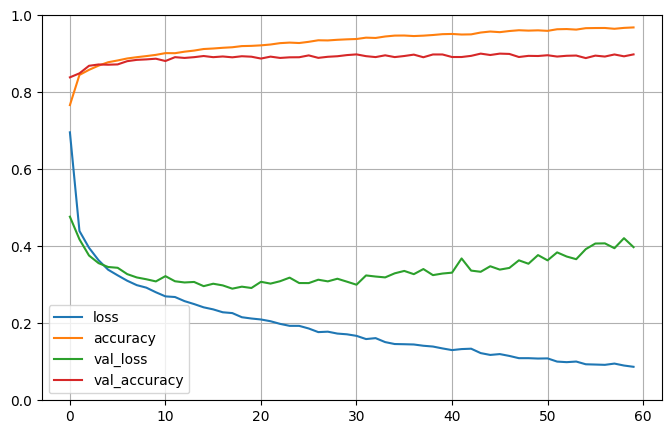

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

313/313 [==============================] - 0s 1ms/step


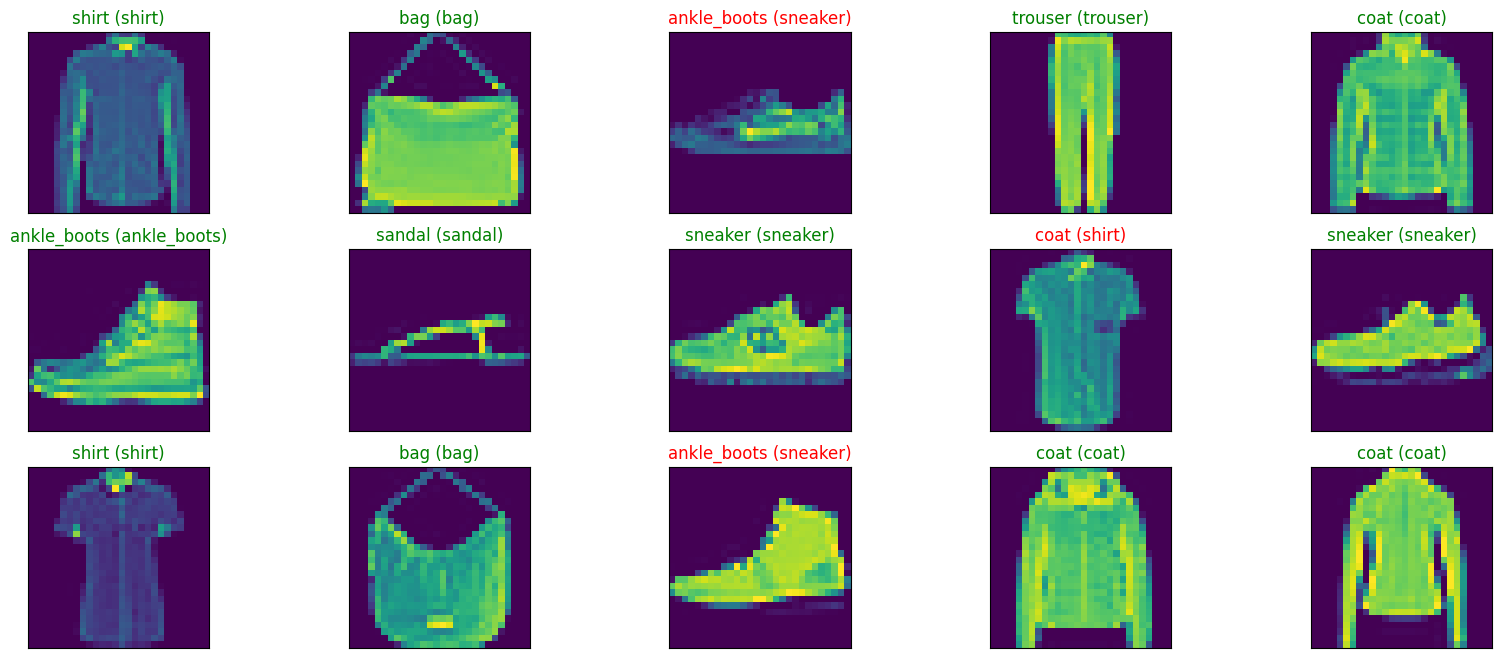

In [11]:
fashion_mnist_labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
y_hat = model.predict(X_test)
X_test = X_test.reshape(10000, 28, 28)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))